In [ ]:
#Inspecting Data: I checked the beginning of the database using head() function, shape, columns, churn value count, missing values and data quality. 

In [1]:
import os
print("Current directory:", os.getcwd())
print("Parent contents:", os.listdir(".."))
print("Raw data contents:", os.listdir("../Data/Raw"))




Current directory: /Users/rameenmufti/Telco_Churn Project/Notebooks
Parent contents: ['Streamlit ', 'Model', 'API', '.ipynb_checkpoints', 'Data', 'Notebooks', 'SRC']
Raw data contents: ['Telco_raw.csv', '.ipynb_checkpoints']


In [2]:
import pandas as pd

df = pd.read_csv("../Data/Raw/Telco_raw.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape
df.columns
df["Churn"].value_counts()
df.isna().sum().sort_values(ascending=False)


customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#Cleaning Data

In [6]:
#Coverting TotalCharges from Text to Numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isna().sum()

np.int64(11)

In [7]:
#Handling Missing TotalCharges 
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [8]:
#Converting Target Variable Churn 
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0}) #Binary Variable 

In [9]:
df.dtypes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
#Create Table Statements

In [11]:
#Customer
import sqlite3

conn = sqlite3.connect("telco_churn.db") # Attempt 2: SQlite database created in the current working directory.
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS Customer (
    customer_id TEXT PRIMARY KEY,
    gender TEXT,
    senior_citizen INTEGER,
    partner TEXT,
    dependents TEXT,
    tenure INTEGER
);
""")

conn.commit()
print("Customer table created successfully.")


Customer table created successfully.


In [12]:
#Serivce 
cursor.execute("""
CREATE TABLE IF NOT EXISTS Services (
    customer_id TEXT PRIMARY KEY,
    phone_service TEXT,
    multiple_lines TEXT,
    internet_service TEXT,
    online_security TEXT,
    online_backup TEXT,
    device_protection TEXT,
    tech_support TEXT,
    streaming_tv TEXT,
    streaming_movies TEXT,
    FOREIGN KEY (customer_id) REFERENCES Customer(customer_id)
);
""")

conn.commit()
print("Services table created successfully.")

Services table created successfully.


In [13]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall() #Checking if both tables created successfully 

[('Customer',), ('Services',), ('Contract',), ('Charges',), ('Churn',)]

In [14]:
#Contract 
cursor.execute("""
CREATE TABLE IF NOT EXISTS Contract (
    customer_id TEXT PRIMARY KEY,
    contract_type TEXT,
    paperless_billing TEXT,
    payment_method TEXT,
    FOREIGN KEY (customer_id) REFERENCES Customer(customer_id)
);
""")

conn.commit()
print("Bingo.")



Bingo.


In [15]:
#Charges
cursor.execute("""
CREATE TABLE IF NOT EXISTS Charges (
    customer_id TEXT PRIMARY KEY,
    monthly_charges REAL,
    total_charges REAL,
    FOREIGN KEY (customer_id) REFERENCES Customer(customer_id)
);
""")

conn.commit()
print("Charges table created successfully.")

Charges table created successfully.


In [16]:
#Churn 
cursor.execute("""
CREATE TABLE IF NOT EXISTS Churn (
    customer_id TEXT PRIMARY KEY,
    churn INTEGER,
    FOREIGN KEY (customer_id) REFERENCES Customer(customer_id)
);
""")

conn.commit()
print("WOHOO!!")


WOHOO!!


In [17]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables


[('Customer',), ('Services',), ('Contract',), ('Charges',), ('Churn',)]

In [18]:
#Inserting Data into Tables: Data from the normalized database tables was reconstructed using SQL inner joins on the customer_id primary key. The join operation combines customer demographics, service usage, contract details, billing information, and churn outcome into a single analytical dataset, which is then loaded into a Pandas DataFrame for exploratory analysis and machine learning.

In [19]:
import sqlite3

conn = sqlite3.connect("../Data/telco_churn.db")
cursor = conn.cursor()

In [20]:
import os

print(os.listdir("../Data"))


['Cleaned', 'telco_churn.db', '.ipynb_checkpoints', 'Raw']


In [21]:
#Adding clean database to the directory 
type(df)
df_clean = df.copy()
df_clean.to_csv("../Data/Cleaned/telco_clean.csv", index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.


In [22]:
# Load clean data
df_clean = pd.read_csv("../Data/Cleaned/telco_clean.csv")

# Standardize column names to snake_case for SQL
df_clean = df_clean.rename(columns={
    "customerID": "customer_id",
    "SeniorCitizen": "senior_citizen",
    "MonthlyCharges": "monthly_charges",
    "TotalCharges": "total_charges",
    "PhoneService": "phone_service",
    "MultipleLines": "multiple_lines",
    "InternetService": "internet_service",
    "OnlineSecurity": "online_security",
    "OnlineBackup": "online_backup",
    "DeviceProtection": "device_protection",
    "TechSupport": "tech_support",
    "StreamingTV": "streaming_tv",
    "StreamingMovies": "streaming_movies",
    "PaperlessBilling": "paperless_billing",
    "PaymentMethod": "payment_method"
})


df_clean.columns.tolist() #Earlier I removed customer_id prematurely to prevent overfitting which broke the sql queries. I had to remove the bad code, restart the kernel and rerun all the codes. 


['customer_id',
 'gender',
 'senior_citizen',
 'Partner',
 'Dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'Contract',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'Churn']

In [23]:
import os
print("CWD:", os.getcwd())
print("Data folder:", os.listdir("../Data"))


CWD: /Users/rameenmufti/Telco_Churn Project/Notebooks
Data folder: ['Cleaned', 'telco_churn.db', '.ipynb_checkpoints', 'Raw']


In [24]:
cursor.executescript("""
CREATE TABLE IF NOT EXISTS Customer (
    customer_id TEXT PRIMARY KEY,
    gender TEXT,
    senior_citizen INTEGER,
    partner TEXT,
    dependents TEXT,
    tenure INTEGER
);

CREATE TABLE IF NOT EXISTS Services (
    customer_id TEXT PRIMARY KEY,
    phone_service TEXT,
    multiple_lines TEXT,
    internet_service TEXT,
    online_security TEXT,
    online_backup TEXT,
    device_protection TEXT,
    tech_support TEXT,
    streaming_tv TEXT,
    streaming_movies TEXT,
    FOREIGN KEY (customer_id) REFERENCES Customer(customer_id)
);

CREATE TABLE IF NOT EXISTS Contract (
    customer_id TEXT PRIMARY KEY,
    contract_type TEXT,
    paperless_billing TEXT,
    payment_method TEXT,
    FOREIGN KEY (customer_id) REFERENCES Customer(customer_id)
);

CREATE TABLE IF NOT EXISTS Charges (
    customer_id TEXT PRIMARY KEY,
    monthly_charges REAL,
    total_charges REAL,
    FOREIGN KEY (customer_id) REFERENCES Customer(customer_id)
);

CREATE TABLE IF NOT EXISTS Churn (
    customer_id TEXT PRIMARY KEY,
    churn INTEGER,
    FOREIGN KEY (customer_id) REFERENCES Customer(customer_id)
);
""")

conn.commit()
print("All tables created")


All tables created


In [25]:
import sqlite3

db_path = "/Users/rameenmufti/Telco_Churn Project/Data/telco_churn.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()


In [26]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall() 

[('Services',), ('Customer',), ('Contract',), ('Charges',), ('Churn',)]

In [27]:
#Customer Table
cursor.executemany("""
INSERT OR REPLACE INTO Customer
VALUES (?, ?, ?, ?, ?, ?);
""",
df_clean[
    ["customer_id","gender","senior_citizen","Partner","Dependents","tenure"]
].values.tolist())

conn.commit()


In [28]:
#Services Table 
cursor.executemany("""
INSERT OR REPLACE INTO Services
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?);
""",
df_clean[
    ["customer_id","phone_service","multiple_lines","internet_service",
     "online_security","online_backup","device_protection",
     "tech_support","streaming_tv","streaming_movies"]
].values.tolist())

conn.commit()

In [29]:
#Contract Table
cursor.executemany("""
INSERT OR REPLACE INTO Contract
VALUES (?, ?, ?, ?);
""",
df_clean[
    ["customer_id","Contract","paperless_billing","payment_method"]
].values.tolist())

conn.commit()


In [30]:
# Charges Table 
cursor.executemany("""
INSERT OR REPLACE INTO Charges
VALUES (?, ?, ?);
""",
df_clean[
    ["customer_id","monthly_charges","total_charges"]
].values.tolist())

conn.commit()

In [31]:
#Churn Table 
cursor.executemany("""
INSERT OR REPLACE INTO Churn
VALUES (?, ?);
""",
df_clean[
    ["customer_id","Churn"]
].values.tolist())

conn.commit()

In [32]:
#Checking for integirty constraints. 
for table in ["Customer","Services","Contract","Charges","Churn"]:
    cursor.execute(f"SELECT COUNT(*) FROM {table}")
    print(table, cursor.fetchone()[0])


Customer 7043
Services 7043
Contract 7043
Charges 7043
Churn 7043


In [33]:
cursor.execute("PRAGMA table_info(Contract);")
cursor.fetchall()



[(0, 'customer_id', 'TEXT', 0, None, 1),
 (1, 'contract_type', 'TEXT', 0, None, 0),
 (2, 'paperless_billing', 'TEXT', 0, None, 0),
 (3, 'payment_method', 'TEXT', 0, None, 0)]

In [34]:
#SQL Inner Join 
query = """
SELECT
    c.customer_id,
    c.gender,
    c.senior_citizen,
    c.Partner,
    c.Dependents,
    c.tenure,

    s.phone_service,
    s.internet_service,
    s.online_security,
    s.tech_support,

    ct.contract_type,
    ct.payment_method,

    ch.monthly_charges,
    ch.total_charges,

    cr.Churn
FROM Customer c
JOIN Services s   ON c.customer_id = s.customer_id
JOIN Contract ct  ON c.customer_id = ct.customer_id
JOIN Charges ch   ON c.customer_id = ch.customer_id
JOIN Churn cr     ON c.customer_id = cr.customer_id;
"""

In [35]:
import pandas as pd

df_joined = pd.read_sql_query(query, conn)
df_joined.head()


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,internet_service,online_security,tech_support,contract_type,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,One year,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,Month-to-month,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,Fiber optic,No,No,Month-to-month,Electronic check,70.70,151.65,1


In [36]:
#Checking imbalance and proportions for Churn 
df_joined["churn"].value_counts() # stratified sampling required because there is a larger number of non-churn customers compared to churn customers which may lead to biased model evaluation. 
df_joined["churn"].value_counts(normalize=True)


churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [37]:
#Seperate Features and Target 
X = df_joined.drop(columns=["churn"])
y = df_joined["churn"]


In [38]:
#Stratified train/test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [39]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True) #stratification successful because I am seeing nearly equal for training/test sets. 


(churn
 0    0.734647
 1    0.265353
 Name: proportion, dtype: float64,
 churn
 0    0.734564
 1    0.265436
 Name: proportion, dtype: float64)

In [40]:
#Profiling and Correlation

In [41]:
#Shape, Types and Missing Values 
df_joined.shape #7043 rows 
df_joined.info() # correct dtypes
df_joined.isna().sum().sort_values(ascending=False) # no missing values recorded 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7043 non-null   object 
 1   gender            7043 non-null   object 
 2   senior_citizen    7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phone_service     7043 non-null   object 
 7   internet_service  7043 non-null   object 
 8   online_security   7043 non-null   object 
 9   tech_support      7043 non-null   object 
 10  contract_type     7043 non-null   object 
 11  payment_method    7043 non-null   object 
 12  monthly_charges   7043 non-null   float64
 13  total_charges     7043 non-null   float64
 14  churn             7043 non-null   int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 825.5+ KB


customer_id         0
gender              0
senior_citizen      0
partner             0
dependents          0
tenure              0
phone_service       0
internet_service    0
online_security     0
tech_support        0
contract_type       0
payment_method      0
monthly_charges     0
total_charges       0
churn               0
dtype: int64

In [42]:
#Range, Skewness and Capped Values 
df_joined.describe() #Tenure and total charges show right skewness meaning a large number of new and smaller number of old customers. Varying service bundles due to moderate spread of monthly charges. 


,senior_citizen,tenure,monthly_charges,total_charges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


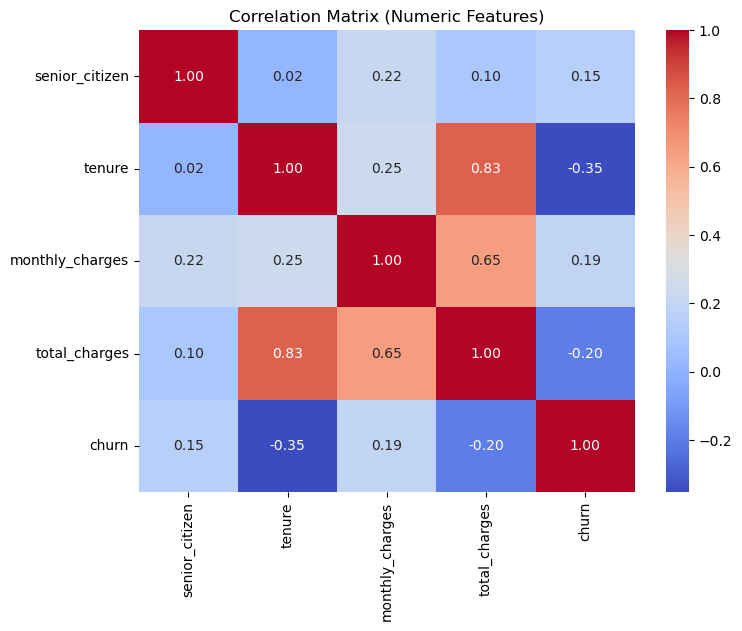

In [43]:
#Correlation Matrix 
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df_joined.select_dtypes(include=["int64", "float64"]).columns

corr = df_joined[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show() # Tenure negative correlation with Churn showing long term customers less likely to churn. Monthly charges positive correlation with churn showing high cost customers more likely to leave. 





In [44]:
#Based on profiling and correlation analysis, the following preprocessing steps are recommended:
#Scale numeric features (tenure, monthly charges, total charges) prior to modeling.
#Encode categorical variables using one-hot encoding.
#Consider log transformation for highly skewed variables if required by model assumptions.
#Drop customer identifiers prior to model training to prevent data leakage.

In [45]:
#Preprocessing and Baseline Model 


In [46]:
# Identifying columns and dropping identifier 
# Target already defined
y = df_joined["churn"]

# Drop identifier + target
X = df_joined.drop(columns=["customer_id", "churn"])

# Identify feature types
numeric_features = [
    "tenure",
    "monthly_charges",
    "total_charges"
]

categorical_features = [
    col for col in X.columns if col not in numeric_features
]

numeric_features, categorical_features

(['tenure', 'monthly_charges', 'total_charges'],
 ['gender',
  'senior_citizen',
  'partner',
  'dependents',
  'phone_service',
  'internet_service',
  'online_security',
  'tech_support',
  'contract_type',
  'payment_method'])

In [47]:
#Building preprocessing pipeline with Column Transformer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [49]:
from sklearn.metrics import f1_score 

In [50]:
#Full Modeling Pipeline 
from sklearn.linear_model import LogisticRegression

log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=2000,
        solver="lbfgs",
        C=0.5,                # stronger regularization
        class_weight="balanced",  
        n_jobs=-1
    ))
])

In [51]:
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'senior_citizen',
                                                   'partner', 'dependents',
                                                   'phone_service',
                                                   'internet_service',
                                                   'online_security',
                                                   'tech_support',
                                                   'contract_type',
                                                   'payment_method'])])),
                ('classifier',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=2000, n_jobs=-1))])

In [52]:
y_pred = log_reg_pipeline.predict(X_test)
f1_log = f1_score(y_test, y_pred)

print("Experiment 1 – Logistic Regression F1:", f1_log)

Experiment 1 – Logistic Regression F1: 0.621196222455404


In [53]:
#Experiment 2: Adding PCA to Existing Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

log_reg_pca_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_reg_pca_pipeline.fit(X_train, y_train)

y_pred_pca = log_reg_pca_pipeline.predict(X_test)
f1_pca = f1_score(y_test, y_pred_pca)

f1_log_pca = f1_score(y_test, y_pred_pca)


In [54]:
#Experiment 3: Ridge Classifier 
from sklearn.linear_model import RidgeClassifier

ridge_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RidgeClassifier())
])

ridge_pipeline.fit(X_train, y_train)
y_pred = ridge_pipeline.predict(X_test)

f1_ridge = f1_score(y_test, y_pred)



In [55]:
#Experiment 4: Ridge Classifier and PCA 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

ridge_pca_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("classifier", RidgeClassifier())
])

ridge_pca_pipeline.fit(X_train, y_train)

y_pred = ridge_pca_pipeline.predict(X_test)
f1_ridge_pca = f1_score(y_test, y_pred)


In [56]:
#Experiment 5: Gradient Boosting without PCA 
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

gb_pipeline.fit(X_train, y_train)

y_pred = gb_pipeline.predict(X_test)
f1_gb = f1_score(y_test, y_pred)


In [57]:
#Experiment 6: Gradient Boosting with PCA 
gb_pca_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

gb_pca_pipeline.fit(X_train, y_train)

y_pred = gb_pca_pipeline.predict(X_test)
f1_gb_pca = f1_score(y_test, y_pred)

In [58]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
#Experiment 7: XGBoost no PCA 
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)

y_pred = xgb_pipeline.predict(X_test)
f1_xgb = f1_score(y_test, y_pred)

In [60]:
#Experiment 8: XGBoost with PCA 
xgb_pca_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("classifier", XGBClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    ))
])

xgb_pca_pipeline.fit(X_train, y_train)

y_pred = xgb_pca_pipeline.predict(X_test)
f1_xgb_pca = f1_score(y_test, y_pred)

In [61]:
#Experiment 9: LightGBM no PCA 
from lightgbm import LGBMClassifier
lgbm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42
    ))
])

lgbm_pipeline.fit(X_train, y_train)

y_pred = lgbm_pipeline.predict(X_test)
f1_lgbm = f1_score(y_test, y_pred)

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [62]:
#Experiment 10: Lightgbm and PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

lgbm_pca_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("classifier", LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42
    ))
])

lgbm_pca_pipeline.fit(X_train, y_train)
y_pred = lgbm_pca_pipeline.predict(X_test)

f1_lgbm_pca = f1_score(y_test, y_pred)



[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [65]:
#Experiment 11: Logistical Regression Class Weight Balance with PCA 
log_bal_pca_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("classifier", LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ))
])

log_bal_pca_pipeline.fit(X_train, y_train)
y_pred = log_bal_pca_pipeline.predict(X_test)
f1_log_bal_pca = f1_score(y_test, y_pred)

In [66]:
#Experiment 12: Random Forest no PCA
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        class_weight="balanced",
        random_state=42
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

f1_rf = f1_score(y_test, y_pred)



In [67]:
#Experiment 13: Random Forest with PCA 
rf_pca_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("classifier", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        class_weight="balanced",
        random_state=42
    ))
])

rf_pca_pipeline.fit(X_train, y_train)
y_pred = rf_pca_pipeline.predict(X_test)

f1_rf_pca = f1_score(y_test, y_pred)



In [68]:
#Experiment 14: Extra Tree without PCA 
from sklearn.ensemble import ExtraTreesClassifier

et_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", ExtraTreesClassifier(
        n_estimators=300,
        max_depth=12,
        class_weight="balanced",
        random_state=42
    ))
])

et_pipeline.fit(X_train, y_train)
y_pred = et_pipeline.predict(X_test)

f1_et = f1_score(y_test, y_pred)

In [69]:
#Experiment 15: Extra Tree with PCA 
et_pca_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("classifier", ExtraTreesClassifier(
        n_estimators=300,
        max_depth=12,
        class_weight="balanced",
        random_state=42
    ))
])

et_pca_pipeline.fit(X_train, y_train)
y_pred = et_pca_pipeline.predict(X_test)

f1_et_pca = f1_score(y_test, y_pred)


In [70]:
#Creating final Comparison Table 
results = pd.DataFrame([
    ("Logistic", f1_log),
    ("Logistic + PCA", f1_log_pca),
    ("Ridge", f1_ridge),
    ("Ridge + PCA", f1_ridge_pca),
    ("Gradient Boosting", f1_gb),
    ("Gradient Boosting + PCA", f1_gb_pca),
    ("XGBoost", f1_xgb),
    ("XGBoost + PCA", f1_xgb_pca),
    ("LightGBM", f1_lgbm),
    ("LightGBM + PCA", f1_lgbm_pca),
    ("Logistic (Balanced) + PCA", f1_log_bal_pca),
    ("Random Forest", f1_rf),
    ("Random Forest + PCA", f1_rf_pca),
    ("Extra Trees", f1_et),
    ("Extra Trees + PCA", f1_et_pca),
], columns=["Model", "F1 Score"])

results = results.sort_values("F1 Score", ascending=False)
results

,Model,F1 Score
0,Logistic,0.621196
10,Logistic (Balanced) + PCA,0.616684
14,Extra Trees + PCA,0.611236
11,Random Forest,0.606796
12,Random Forest + PCA,0.606211
13,Extra Trees,0.604545
8,LightGBM,0.585859
4,Gradient Boosting,0.583704
5,Gradient Boosting + PCA,0.579186
6,XGBoost,0.577201
